<a href="https://colab.research.google.com/github/Yeow34/PinchAnalysis/blob/main/Pinch_2_(20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pina

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pina import PinchAnalyzer, make_stream

# Arguments: heat flow, supply temperature, target temperature

In [ ]:
cold_1 = make_stream(-45,10,150)
cold_2 = make_stream(-62,45,290)
cold_3 = make_stream(-37,70,110)
hot_1 = make_stream(42,350,240)
hot_2 = make_stream(51.5,270,140)
hot_3 = make_stream(55,150,100)

In [ ]:
min_temp_diff = 20
temp_shift = min_temp_diff/2

analyzer = PinchAnalyzer(temp_shift)
analyzer.add_streams(cold_1, hot_1, cold_2, hot_2, cold_3, hot_3)

In [ ]:
print(
    "Heating demand:       {}\n"
    "Cooling demand:       {}\n"
    "Hot utility target:   {}\n"
    "Cold utility target:  {}\n"
    "Heat recovery target: {}\n"
    "Pinch temperature(s): {}".format(
        analyzer.heating_demand,
        analyzer.cooling_demand,
        analyzer.hot_utility_target,
        analyzer.cold_utility_target,
        analyzer.heat_recovery_target,
        analyzer.pinch_temps,
    )
)

Heating demand:       144.0
Cooling demand:       148.5
Hot utility target:   0.0
Cold utility target:  4.500000000000016
Heat recovery target: 144.0
Pinch temperature(s): [340.0]


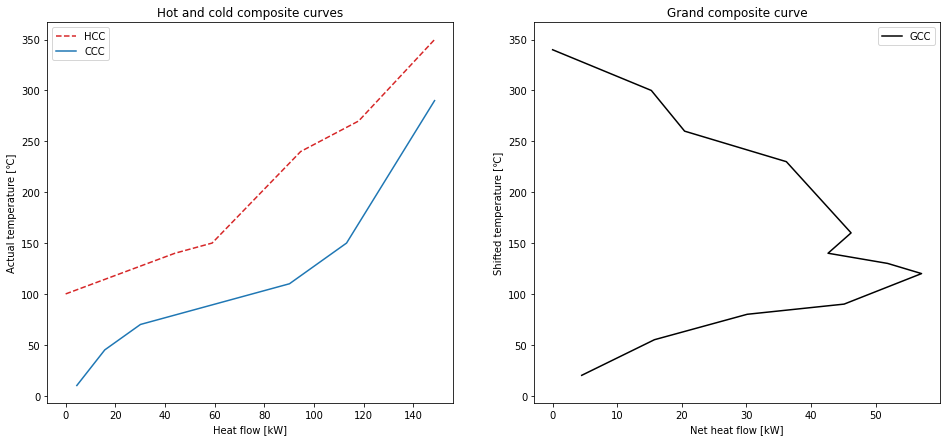

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].plot(*analyzer.hot_composite_curve, color="tab:red", linestyle="--", label="HCC")
ax[0].plot(*analyzer.cold_composite_curve, color="tab:blue", linestyle="-", label="CCC")
ax[0].legend()
ax[0].set_title("Hot and cold composite curves")
ax[0].set_xlabel("Heat flow [kW]")
ax[0].set_ylabel("Actual temperature [\u2103]")

ax[1].plot(*analyzer.grand_composite_curve, color="k", linestyle="-", label="GCC")
ax[1].legend()
ax[1].set_title("Grand composite curve")
ax[1].set_xlabel("Net heat flow [kW]")
ax[1].set_ylabel("Shifted temperature [\u2103]")

# Make the y-axis equal in both plots
ylims = (*ax[0].get_ylim(), *ax[1].get_ylim())
minmax_ylims = (min(ylims), max(ylims))
ax[0].set_ylim(minmax_ylims)
ax[1].set_ylim(minmax_ylims)

plt.show()